In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r'C:\Users\foklo\Downloads\archive (1)\Mental health Depression disorder Data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855               4.828830                1.677082   
1             0.099313               4.829740                1.684746   
2             0.096692               4.831108                1.694334   
3             0.094336               4.830864                1.705320   
4             0.092439               4.829423                1.716069   

   Depression (%)  Alcohol use disorders (%)  
0        4.071831                   0.672404  
1        4.07953

C:\Users\foklo\AppData\Local\Temp\ipykernel_18252\1993131942.py:16: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [16]:
df.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


In [18]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

# Verify that missing values are handled
df.isnull().sum()

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64


index                        0
Entity                       0
Code                         0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

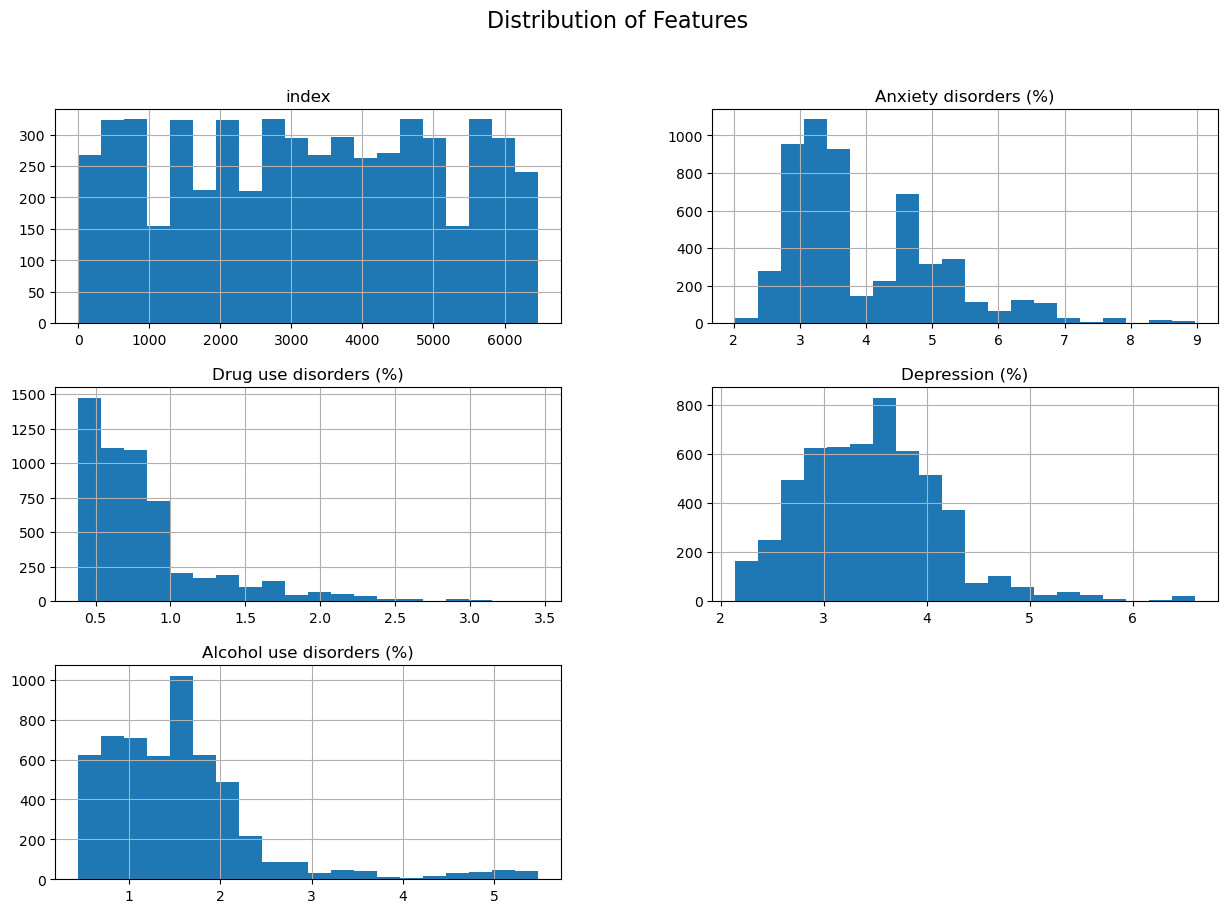

In [20]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()


In [22]:
# Encode 'Entity' and 'Code' since they are categorical variables
label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])
df['Code'] = label_encoder.fit_transform(df['Code'])


In [24]:
# Define X and y
X = df.drop('Depression (%)', axis=1)  # Features
y = df['Depression (%)']  # Target

# Display the shape of the data
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')


Features shape: (5488, 10)
Target shape: (5488,)


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (4390, 10)
X_test shape: (1098, 10)


In [28]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [24]:
# Make predictions using Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Mean Squared Error: 0.002238531901037498
Random Forest R² Score: 0.9943801370242401


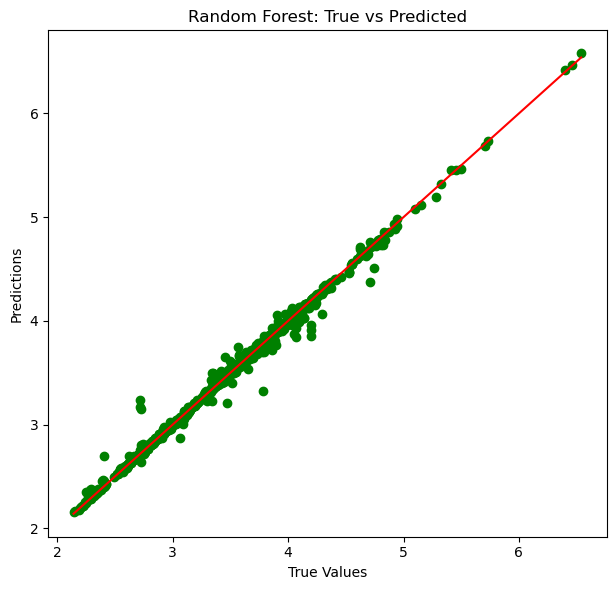

In [72]:
# Plot True vs Predicted for Random Forest
plt.figure(figsize=(12, 6))

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()

In [30]:
# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
# Make predictions using Decision Tree Regressor
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Mean Squared Error: 0.012257592856101996
Decision Tree R² Score: 0.9692271563197202


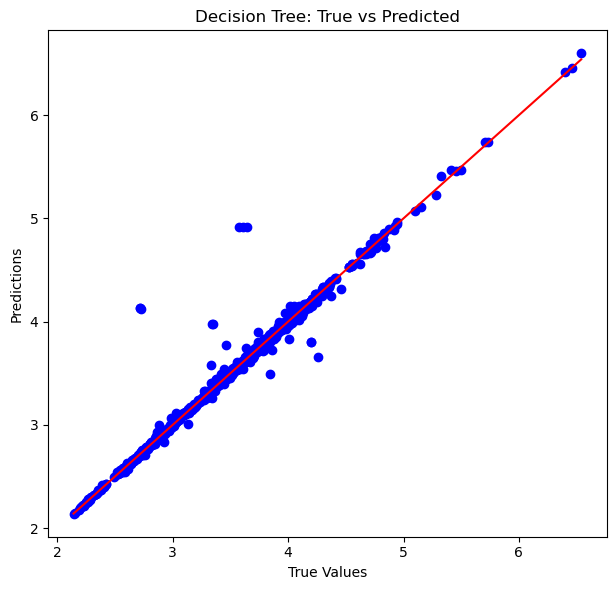

In [34]:
# Plot True vs Predicted for Decision Tree 
plt.figure(figsize=(12, 6))

# Plot for Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Decision Tree: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()